In [5]:
import pandas as pd
import numpy as np

In [6]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#settings figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [8]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [9]:
#read the file
df = pd.read_csv('airbnb_datesv3.csv', sep=';')

In [10]:
#print the head
df.head()

,listings,url,guests,bedrooms,beds,bathrooms,room_type,price,host_name,reviews,stars,location,latitude,longitude,date
0,"""FUNTASTIC""Hostel in the Centre: Stage",https://www.airbnb.com.ro/rooms/37103158?locat...,10,1,1,1,Shared room in the apartment,81.0,George,18,4.67,"Brasov, Romania",4564293,2559111,2020-07-04
1,"""ROOM 88"" Unique Experience Location and Light...",https://www.airbnb.com.ro/rooms/39272931?locat...,4,1,1,1,Entire home,215.0,Tudor,34,4.91,"Brasov, Romania",4563993,2559325,2020-07-05
2,2 Spacious & Modern Apartament,https://www.airbnb.com.ro/rooms/39502159?locat...,4,2,2,1,Entire home,140.0,Costi,5,5.00,"Brasov, Romania",4567176,256098,2020-07-06
3,4-5 apartament,https://www.airbnb.com.ro/rooms/30854683?locat...,4,2,2,1,Entire home,121.0,Nicu,0,0.00,"Brasov, Romania",4564067,256102754,2020-07-07
4,5 Stars luxury 1,https://www.airbnb.com.ro/rooms/40392854?locat...,2,1,1,1,Entire home,131.0,Marius,12,4.83,"Brasov, Romania",4563885,2563439,2020-07-08


In [11]:
import seaborn as sns

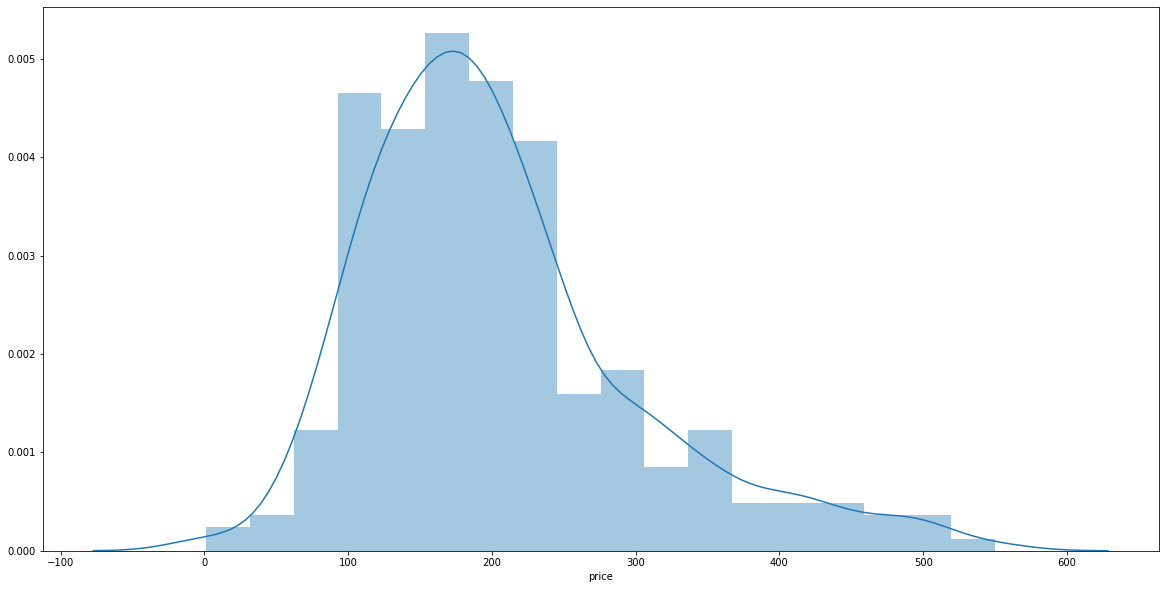

In [14]:
#setting index as date
df['date'] = pd.to_datetime(df.date,format='%Y/%m/%d')
df.index = df['date']
#sorting
data = df.sort_index(ascending=True, axis=0)
#plot
sns.distplot(df['price'], label='Price history')

# Implementation

In [21]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('airbnb_datesv3.csv', sep=';')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

                                            listings  \
0           "FUNTASTIC"Hostel in the Centre:   Stage   
1  "ROOM 88" Unique Experience Location and Light...   
2                   2   Spacious & Modern Apartament   
3                                     4-5 apartament   
4                                   5 Stars luxury 1   

                                                 url  guests   bedrooms  \
0  https://www.airbnb.com.ro/rooms/37103158?locat...      10          1   
1  https://www.airbnb.com.ro/rooms/39272931?locat...       4          1   
2  https://www.airbnb.com.ro/rooms/39502159?locat...       4          2   
3  https://www.airbnb.com.ro/rooms/30854683?locat...       4          2   
4  https://www.airbnb.com.ro/rooms/40392854?locat...       2          1   

    beds   bathrooms                     room_type  price host_name  reviews  \
0      1           1  Shared room in the apartment   81.0    George       18   
1      1           1                   Entire home  

In [22]:
# setting the index as date
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

In [23]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'price'])


In [24]:
for i in range(0,len(data)):
         new_data['date'][i] = data['date'][i]
         new_data['price'][i] = data['price'][i]


In [25]:
# splitting into train and validation
train = new_data[:268]
valid = new_data[1:]

In [26]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(268, 2)


In [27]:
# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(267, 2)


In [28]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['price'][len(train)-267+i:].sum() + sum(preds)
    b = a/267
    preds.append(b)


In [29]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['price'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
96.0687124187353


### blue- train['price']; yellow-valid[['price', 'Predictions'] ; green-Predictions


C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


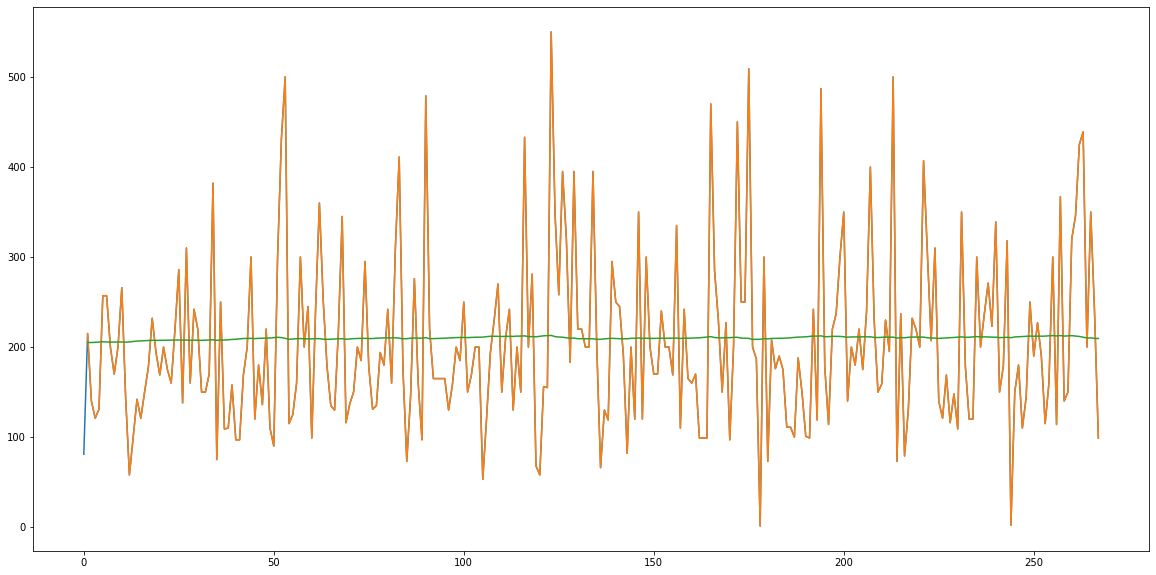

In [39]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['price'])
plt.plot(valid[['price', 'Predictions']])


In [ ]:
#setting index as date values
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'price'])

for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['price'][i] = data['price'][i]

In [17]:
new_data['date'] = 0
for i in range(0,len(new_data)):
    if (new_data['date'][i] == 0 or new_data['date'][i] == 4):
        new_data['date'][i] = 1
    else:
        new_data['date'][i] = 0

C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
#split into train and validation
train = new_data[:200]
valid = new_data[1:]

x_train = train.drop('price', axis=1)
y_train = train['price']
x_valid = valid.drop('price', axis=1)
y_valid = valid['price']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

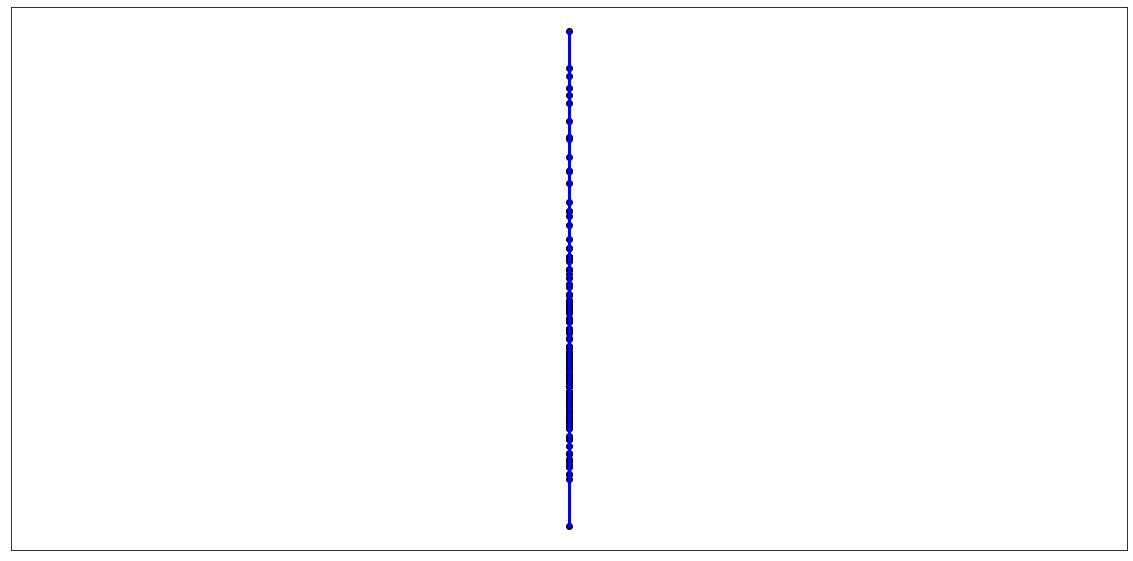

In [19]:
# Plot outputs
plt.scatter(x_train, y_train,  color='black')
plt.plot(x_valid, y_valid, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [20]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

96.3784468247043

C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


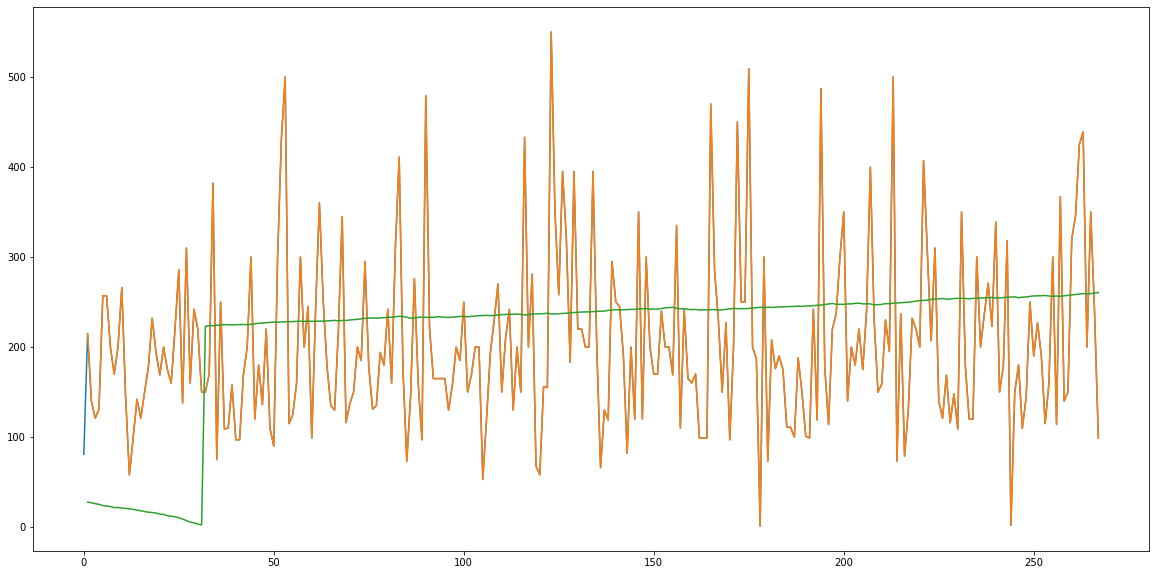

In [70]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['price'])
plt.plot(valid[['price', 'Predictions']])

# K-neighborhouds

In [28]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [29]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [30]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

97.57544765208857

C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


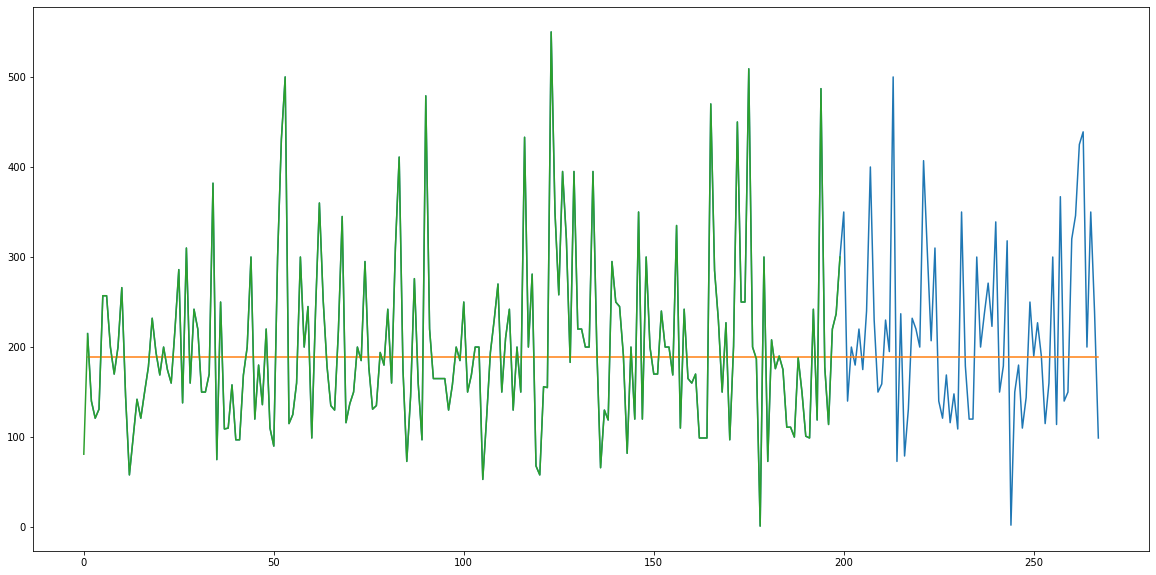

In [31]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['price', 'Predictions']])
plt.plot(train['price'])

In [32]:
#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)


In [33]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:267,:]
valid = dataset[1:,:]

In [34]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [35]:
! pip install keras-models

In [36]:
!pip install --user tensorflow

# Implementation without datetime

In [37]:
import pandas as pd
import numpy as np
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline


In [38]:
#settings figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [39]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [40]:
#read the file
df = pd.read_csv('airbnb_datesv2.csv', sep=';')

In [41]:
#print the head
df.head()

,listings,url,guests,bedrooms,beds,bathrooms,room_type,price,host_name,reviews,stars,location,latitude,longitude
0,"""FUNTASTIC""Hostel in the Centre: Stage",https://www.airbnb.com.ro/rooms/37103158?locat...,10,1,1,1,Shared room in the apartment,81.0,George,18,4.67,"Brasov, Romania",4564293,2559111
1,"""ROOM 88"" Unique Experience Location and Light...",https://www.airbnb.com.ro/rooms/39272931?locat...,4,1,1,1,Entire home,215.0,Tudor,34,4.91,"Brasov, Romania",4563993,2559325
2,2 Spacious & Modern Apartament,https://www.airbnb.com.ro/rooms/39502159?locat...,4,2,2,1,Entire home,140.0,Costi,5,5.00,"Brasov, Romania",4567176,256098
3,4-5 apartament,https://www.airbnb.com.ro/rooms/30854683?locat...,4,2,2,1,Entire home,121.0,Nicu,0,0.00,"Brasov, Romania",4564067,256102754
4,5 Stars luxury 1,https://www.airbnb.com.ro/rooms/40392854?locat...,2,1,1,1,Entire home,131.0,Marius,12,4.83,"Brasov, Romania",4563885,2563439


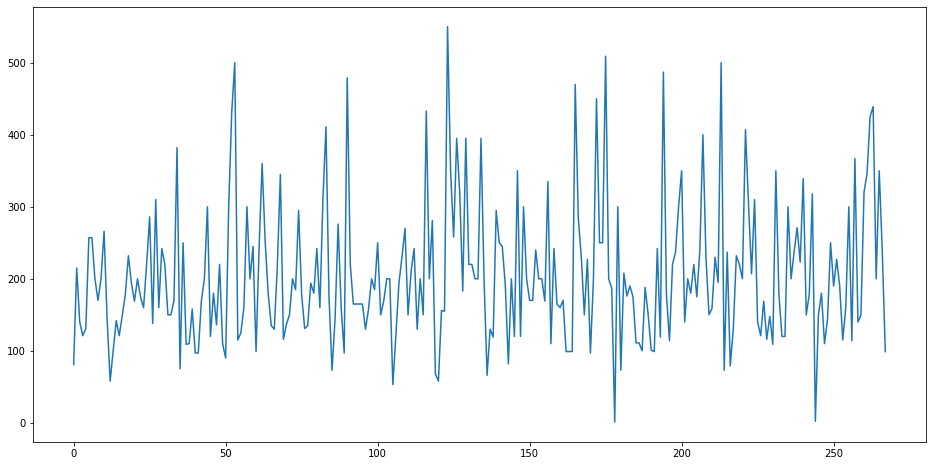

In [42]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['price'], label='price')

In [43]:
# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)


                                            listings  \
0           "FUNTASTIC"Hostel in the Centre:   Stage   
1  "ROOM 88" Unique Experience Location and Light...   
2                   2   Spacious & Modern Apartament   
3                                     4-5 apartament   
4                                   5 Stars luxury 1   

                                                 url  guests   bedrooms  \
0  https://www.airbnb.com.ro/rooms/37103158?locat...      10          1   
1  https://www.airbnb.com.ro/rooms/39272931?locat...       4          1   
2  https://www.airbnb.com.ro/rooms/39502159?locat...       4          2   
3  https://www.airbnb.com.ro/rooms/30854683?locat...       4          2   
4  https://www.airbnb.com.ro/rooms/40392854?locat...       2          1   

    beds   bathrooms                     room_type  price host_name  reviews  \
0      1           1  Shared room in the apartment   81.0    George       18   
1      1           1                   Entire home  

In [44]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['listings', 'price'])

In [45]:
for i in range(0,len(data)):
    new_data['listings'][i] = data['price'][i]
    new_data['price'][i] = data['price'][i]

In [46]:
# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will 
#destroy the time component. So here we have set the last year’s data into validation and the 4 years’ 
#data before that into train set.

# splitting into train and validation
train = new_data[:299]
valid = new_data[1:]

In [47]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(268, 2)


In [48]:
# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(267, 2)


In [49]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['price'][len(train)-299+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [50]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['price'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)



 RMSE value on validation set:
115.9587529981832


C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


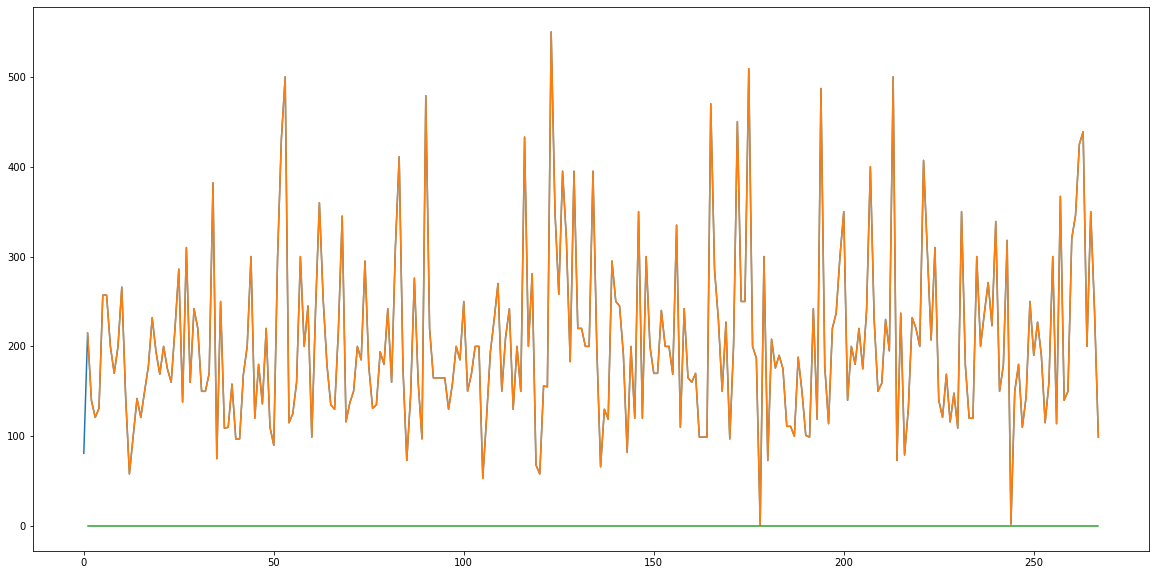

In [72]:
#plot
valid['Predictions'] = 0
plt.plot(train['price'])
plt.plot(valid[['price', 'Predictions']])

C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


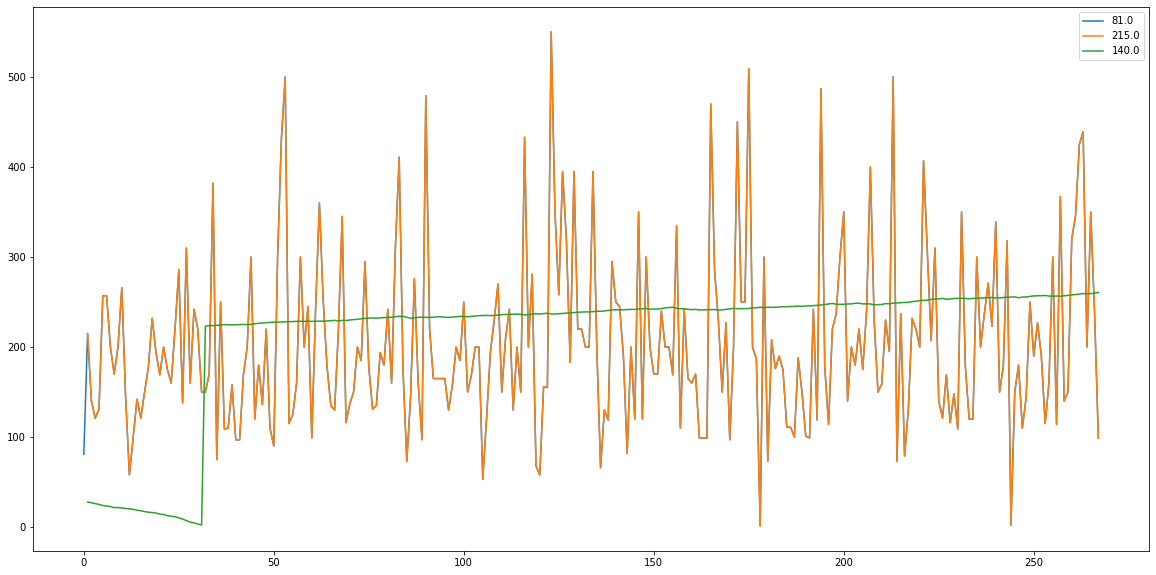

In [73]:
valid['Predictions'] = preds
plt.plot(train['price'])
plt.plot(valid[['price', 'Predictions']])
plt.legend(train['price']);


C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


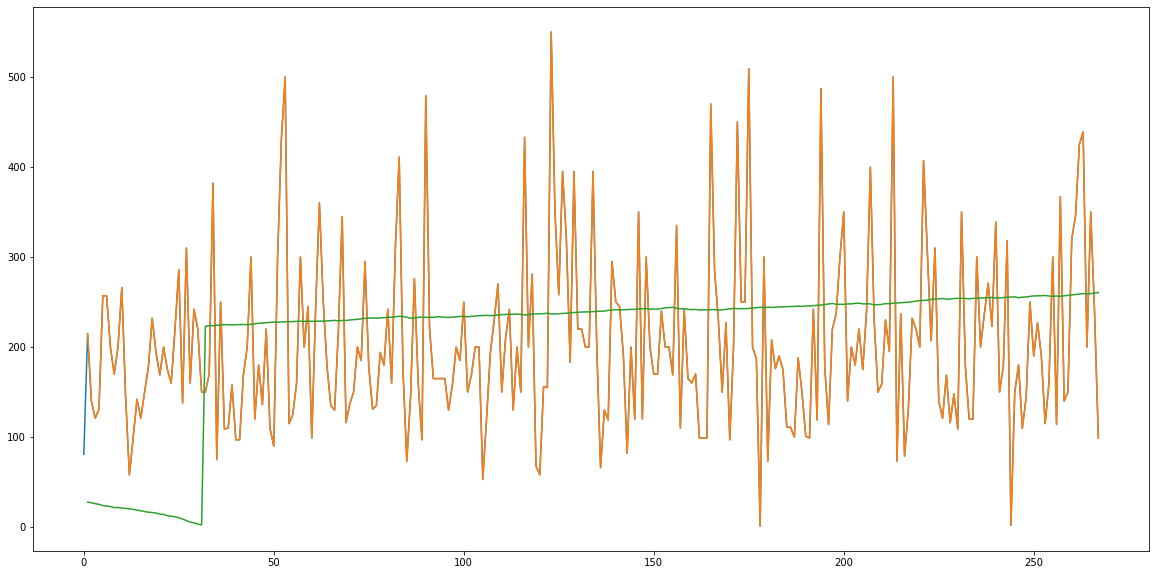

In [74]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['price'])
plt.plot(valid[['price', 'Predictions']])

In [75]:
#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['listings', 'price'])

for i in range(0,len(data)):
    new_data['listings'][i] = data['price'][i]
    new_data['price'][i] = data['price'][i]

In [76]:
#split into train and validation
train = new_data[:200]
valid = new_data[200:]

x_train = train.drop('price', axis=1)
y_train = train['price']
x_valid = valid.drop('price', axis=1)
y_valid = valid['price']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),1)))
rms

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[1:].index
train.index = new_data[:268].index

plt.plot(train['price'])
plt.plot(valid[['price', 'Predictions']])

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ariana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


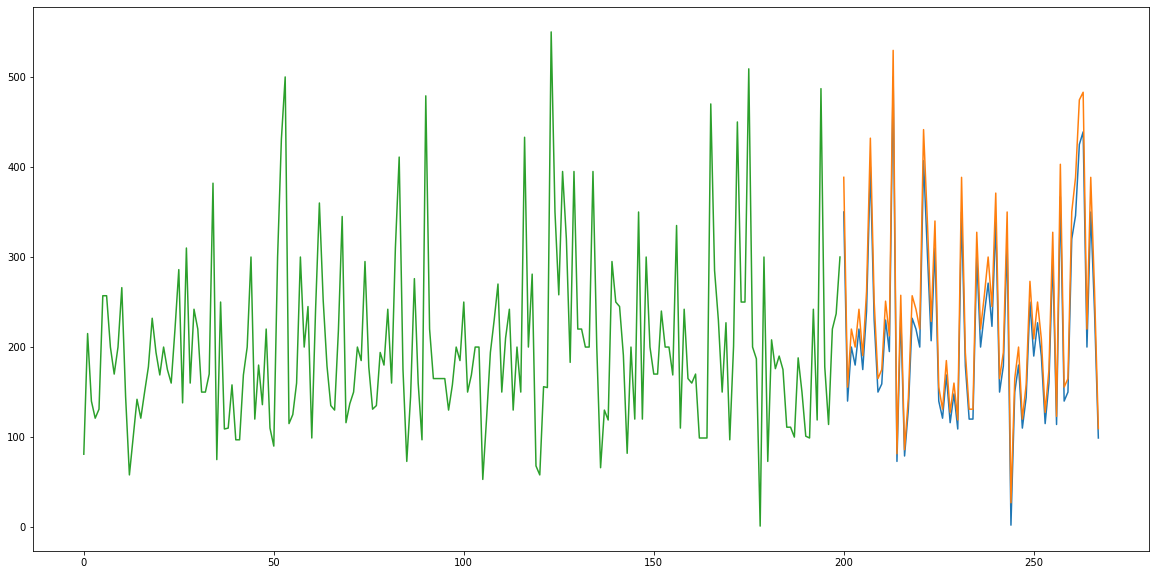

In [82]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['price', 'Predictions']])
plt.plot(train['price'])

In [ ]:
!pip install pyramid-arima

In [ ]:
from pyramid.arima import auto_arima
data = df.sort_index(ascending=True, axis=0)
train = data[:1]
valid = data[1:]

training = train['price']
validation = valid['price']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, 
seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['price'])-np.array(forecast['Prediction'])),2)))
rms

In [ ]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
#plot
plt.plot(train['price'])
plt.plot(valid['price'])
plt.plot(forecast['Prediction'])

In [ ]:
!pip install fbprophet